# 【問題1】1次関数

In [1]:
import numpy as np

In [2]:
x_ndarray = np.arange(-50, 50.1, 0.1)
y_ndarray = 1/2*x_ndarray + 1
print('x: {}'.format(x_ndarray))
print('y: {}'.format(y_ndarray))

x: [-50.  -49.9 -49.8 ...  49.8  49.9  50. ]
y: [-24.   -23.95 -23.9  ...  25.9   25.95  26.  ]


# 【問題2】配列の結合

## 解答1

In [3]:
merged_ndarray = np.array([x_ndarray, y_ndarray]).T
print('結合した配列:{}'.format(merged_ndarray))

結合した配列:[[-50.   -24.  ]
 [-49.9  -23.95]
 [-49.8  -23.9 ]
 ...
 [ 49.8   25.9 ]
 [ 49.9   25.95]
 [ 50.    26.  ]]


## 解答2

In [4]:
x_ndarray_newaxis = x_ndarray[:, np.newaxis]
y_ndarray_newaxis = y_ndarray[:, np.newaxis]
print(x_ndarray_newaxis)
print(y_ndarray_newaxis)

[[-50. ]
 [-49.9]
 [-49.8]
 ...
 [ 49.8]
 [ 49.9]
 [ 50. ]]
[[-24.  ]
 [-23.95]
 [-23.9 ]
 ...
 [ 25.9 ]
 [ 25.95]
 [ 26.  ]]


In [5]:
merged_ndarray_newaxis = np.concatenate([x_ndarray_newaxis, y_ndarray_newaxis], axis=1)
print('結合した配列:{}'.format(merged_ndarray_newaxis))

結合した配列:[[-50.   -24.  ]
 [-49.9  -23.95]
 [-49.8  -23.9 ]
 ...
 [ 49.8   25.9 ]
 [ 49.9   25.95]
 [ 50.    26.  ]]


# 【問題3】勾配を求める

In [6]:
delta_x = merged_ndarray[:, 0][1:] - merged_ndarray[:, 0][:-1]
delta_y = merged_ndarray[:, 1][1:] - merged_ndarray[:, 1][:-1]
grad = delta_y/delta_x
print('勾配:{}'.format(grad))

勾配:[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5

# 【問題4】グラフを描く

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline

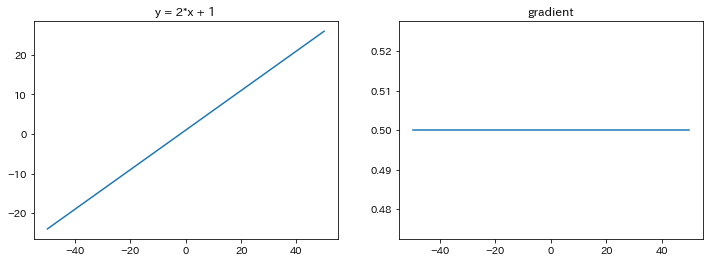

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(x_ndarray, y_ndarray)
ax[0].set_title('y = 2*x + 1')
ax[1].plot(x_ndarray[1:], grad)
ax[1].set_title('gradient')
plt.show()

# 【問題5】Pythonの関数化

In [9]:
def compute_gradient(function, x_range=(-50, 50.1, 0.1)):
    """
    変化量を使い勾配を計算する。

    Parameters
    ----------------
    function : function
      求めたい関数、xのndarrayを入れるとyのndarrayを返すもの。
    x_range : tuple
      np.arange()の引数と同じ方法で範囲を指定する。

    Returns
    ----------------
    array_xy : ndarray, shape(n, 2)
      xとyを結合したもの。nはx_rangeに依存する。
    gradient : ndarray, shape(n-1,)
      関数の勾配。差をとるため要素は1つ減る
    """
    
    x_ndarray = np.arange(x_range[0], x_range[1], x_range[2])
    y_ndarray = function(x_ndarray)
    array_xy = np.array([x_ndarray, y_ndarray]).T
    delta_x = array_xy[:, 0][1:] - array_xy[:, 0][:-1]
    delta_y = array_xy[:, 1][1:] - array_xy[:, 1][:-1]
    gradient = delta_y/delta_x
    
    return array_xy, gradient

def function1(array_x):
    array_y = array_x**2
    return array_y

def function2(array_x):
    array_y = 2*(array_x**2) + 2**array_x
    return array_y

def function3(array_x):
    array_y = np.sin(array_x**(1/2))
    return array_y

array_xy_function1, gradient_function1 = compute_gradient(function1)
array_xy_function2, gradient_function2 = compute_gradient(function2)
array_xy_function3, gradient_function3 = compute_gradient(function3, x_range=(0, 50.1, 0.1))

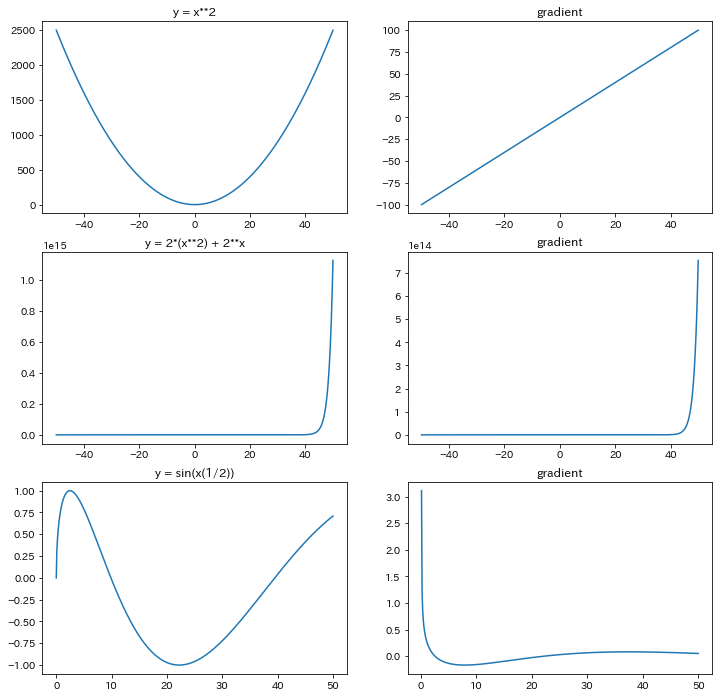

In [10]:
fig, ax = plt.subplots(3, 2, figsize=(12, 12))
ax[0, 0].plot(array_xy_function1[:,0], array_xy_function1[:,1])
ax[0, 0].set_title('y = x**2')
ax[0, 1].plot(array_xy_function1[1:,0], gradient_function1)
ax[0, 1].set_title('gradient')
ax[1, 0].plot(array_xy_function2[:,0], array_xy_function2[:,1])
ax[1, 0].set_title('y = 2*(x**2) + 2**x')
ax[1, 1].plot(array_xy_function2[1:,0], gradient_function2)
ax[1, 1].set_title('gradient')
ax[2, 0].plot(array_xy_function3[:,0], array_xy_function3[:,1])
ax[2, 0].set_title('y = sin(x(1/2))')
ax[2, 1].plot(array_xy_function3[1:,0], gradient_function3)
ax[2, 1].set_title('gradient')
plt.show()

# 【問題6】最小値を求める

## y = x**2

In [11]:
min_function1 = array_xy_function1[:, 1].min()
min_index_function1 = array_xy_function1[:, 1].argmin()
print('yの最小値:{}, yの最小値のindex:{}'.format(min_function1, min_index_function1))
print('最小のyをとる前後の勾配:{}'.format(list([gradient_function1[min_index_function1 - 1],
                                      gradient_function1[min_index_function1 + 1]])))

yの最小値:5.048709793414476e-25, yの最小値のindex:500
最小のyをとる前後の勾配:[-0.09999999999858034, 0.30000000000142535]


## y = 2*(x**2) + 2**x

In [12]:
min_function2 = array_xy_function2[:, 1].min()
min_index_function2 = array_xy_function2[:, 1].argmin()
print('yの最小値:{}, yの最小値のindex:{}'.format(min_function2, min_index_function2))
print('最小のyをとる前後の勾配:{}'.format(list([gradient_function2[min_index_function2 - 1],
                                      gradient_function2[min_index_function2 + 1]])))

yの最小値:0.9505505632959851, yの最小値のindex:498
最小のyをとる前後の勾配:[-0.4170183305979998, 0.4696700846350943]


## y = sin(x(1/2))

In [13]:
min_function3 = array_xy_function3[:, 1].min()
min_index_function3 = array_xy_function3[:, 1].argmin()
print('yの最小値:{}, yの最小値のindex:{}'.format(min_function3, min_index_function3))
print('最小のyをとる前後の勾配:{}'.format(list([gradient_function3[min_index_function3 - 1],
                                      gradient_function3[min_index_function3 + 1]])))

yの最小値:-0.9999997540298113, yの最小値のindex:222
最小のyをとる前後の勾配:[-0.0006388422559544435, 0.0016061158921243152]
